In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam,SGD,RMSprop,Adadelta,Adagrad


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
n_data=pd.read_csv('/content/drive/MyDrive/datas/project data/delivery.csv')
n_data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import statistics as st
st.mode(n_data['Delivery_person_Age'])

'35'

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
st.mode(n_data['Delivery_person_Ratings'])

'4.8'

In [7]:
n_data['Delivery_person_Age']=n_data['Delivery_person_Age'].apply(lambda x:35 if x=='NaN ' else x)
n_data['Delivery_person_Ratings']=n_data['Delivery_person_Ratings'].apply(lambda x:4.8 if x=='NaN ' else x)
n_data.Delivery_person_Age.unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 35, '28', '39', '30', '15',
       '50'], dtype=object)

In [8]:
n_data.Delivery_person_Ratings.unique()

array(['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1',
       '5', '3.5', 4.8, '3.8', '3.9', '3.7', '2.6', '2.5', '3.6', '3.1',
       '2.7', '1', '3.2', '3.3', '6', '3.4', '2.8', '2.9', '3'],
      dtype=object)

In [9]:
n_data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [10]:
data=n_data.copy()

In [11]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [12]:
data.shape

(45593, 20)

In [13]:
data.drop(['ID','Order_Date','Time_Orderd','Time_Order_picked','multiple_deliveries','Festival','City','Vehicle_condition','Weatherconditions','Road_traffic_density'],axis=1,inplace=True)

In [14]:
data.head(10)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,(min) 24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,(min) 33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,(min) 26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,(min) 21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,(min) 30
5,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,(min) 26
6,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,Meal,scooter,(min) 40
7,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,Meal,motorcycle,(min) 32
8,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,Buffet,motorcycle,(min) 34
9,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,Snack,motorcycle,(min) 46


In [15]:
data.isna().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [16]:
data.dtypes

Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                 object
dtype: object

In [17]:

data.Delivery_person_ID.unique()

array(['INDORES13DEL02 ', 'BANGRES18DEL02 ', 'BANGRES19DEL01 ', ...,
       'KOCRES04DEL01 ', 'BHPRES06DEL03 ', 'GOARES03DEL03 '], dtype=object)

In [18]:
len(data.Delivery_person_ID.unique())

1320

In [19]:
data.Delivery_person_Ratings.unique()

array(['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1',
       '5', '3.5', 4.8, '3.8', '3.9', '3.7', '2.6', '2.5', '3.6', '3.1',
       '2.7', '1', '3.2', '3.3', '6', '3.4', '2.8', '2.9', '3'],
      dtype=object)

In [20]:
data.Delivery_person_Age.unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 35, '28', '39', '30', '15',
       '50'], dtype=object)

In [21]:
data.Type_of_vehicle.unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [22]:
import warnings
warnings.filterwarnings('ignore')
data['Time_taken(min)']=data['Time_taken(min)'].str.replace('(','').str.replace('min','').str.replace(')','')

In [23]:
data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Delivery_person_ID']=le.fit_transform(data['Delivery_person_ID'])
data['Type_of_order']=le.fit_transform(data['Type_of_order'])
data['Type_of_vehicle']=le.fit_transform(data['Type_of_vehicle'])

In [25]:
data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,637,37,4.9,22.745049,75.892471,22.765049,75.912471,3,2,24
1,232,34,4.5,12.913041,77.683237,13.043041,77.813237,3,3,33
2,234,23,4.4,12.914264,77.678400,12.924264,77.688400,1,2,26
3,397,38,4.7,11.003669,76.976494,11.053669,77.026494,0,2,21
4,333,32,4.6,12.972793,80.249982,13.012793,80.289982,3,3,30
...,...,...,...,...,...,...,...,...,...,...
45588,672,30,4.8,26.902328,75.794257,26.912328,75.804257,2,2,32
45589,45,21,4.6,0.000000,0.000000,0.070000,0.070000,0,2,36
45590,326,30,4.9,13.022394,80.242439,13.052394,80.272439,1,3,16
45591,390,20,4.7,11.001753,76.986241,11.041753,77.026241,3,2,26


In [26]:
#haversine formula
import numpy as np
R=6371 #set earth radius in kilometer
def deg_to_rad(degrees):
    return degrees*(np.pi/180)
#function to calculate the distence b/w 2 pt using haversine formula
def distcalculate(lat1,lon1,lat2,lon2):
    d_lat=deg_to_rad(lat2-lat1)
    d_lon=deg_to_rad(lon2-lon1)
    a=np.sin(d_lat/2)**2+np.cos(deg_to_rad(lat1))*np.cos(deg_to_rad(lat2))*np.sin(d_lon/2)**2
    c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R*c
#calculate the distence between each pair of points
for i in range(len(data)):
    data.loc[i,'distance']=distcalculate(data.loc[i,'Restaurant_latitude'],
                                       data.loc[i,'Restaurant_longitude'],
                                       data.loc[i,'Delivery_location_latitude'],
                                       data.loc[i,'Delivery_location_longitude'])


In [27]:
data=data.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1)

In [28]:
data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,637,37,4.9,3,2,24,3.025149
1,232,34,4.5,3,3,33,20.183530
2,234,23,4.4,1,2,26,1.552758
3,397,38,4.7,0,2,21,7.790401
4,333,32,4.6,3,3,30,6.210138
...,...,...,...,...,...,...,...
45588,672,30,4.8,2,2,32,1.489846
45589,45,21,4.6,0,2,36,11.007735
45590,326,30,4.9,1,3,16,4.657195
45591,390,20,4.7,3,2,26,6.232393


In [29]:

len(data['distance'])

45593

In [30]:
data['Time_taken(min)'].unique()


array([' 24', ' 33', ' 26', ' 21', ' 30', ' 40', ' 32', ' 34', ' 46',
       ' 23', ' 20', ' 41', ' 15', ' 36', ' 39', ' 18', ' 38', ' 47',
       ' 12', ' 22', ' 25', ' 35', ' 10', ' 19', ' 11', ' 28', ' 52',
       ' 16', ' 27', ' 49', ' 17', ' 14', ' 37', ' 44', ' 42', ' 31',
       ' 13', ' 29', ' 50', ' 43', ' 48', ' 54', ' 53', ' 45', ' 51'],
      dtype=object)

In [31]:
data['Delivery_person_Age'].unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 35, '28', '39', '30', '15',
       '50'], dtype=object)

In [32]:
data['Delivery_person_Age']=pd.Series(data['Delivery_person_Age'],dtype=int)
data['Delivery_person_Ratings']=pd.Series(data['Delivery_person_Ratings'],dtype=float)
data['Time_taken(min)']=pd.Series(data['Time_taken(min)'],dtype=int)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

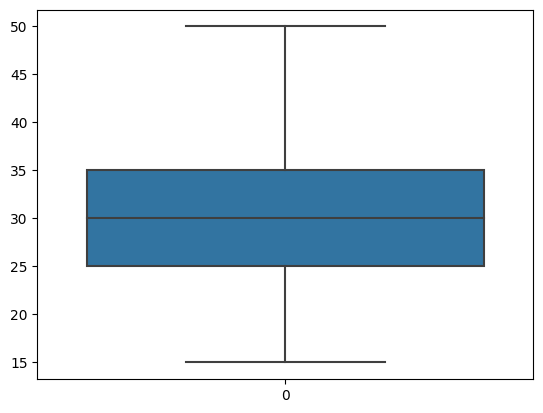

In [34]:
sns.boxplot(data['Delivery_person_Age'])

In [35]:
# list=['Weatherconditions','Road_traffic_density',
#       'Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
# fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(60,150))
# for i,col in enumerate(list):
#     sns.countplot(data[col],palette='magma',ax=axes[i][0])
#     axes[i][0].set_title(f'Count Plot for {category}')
#     axes[i][0].set_xlabel('Categories')
#     axes[i][0].set_ylabel('Count')


#     axes[i][1].pie(c_data[col].value_counts(), autopct='%1.1f%%',labels=c_data[col].value_counts().keys(),colors=['#d07b95','#7289da',"#B9C0C9",'#b6a066','#4fb2a1','#94583C','#125183'])
#     axes[i][1].set_title(f'Pie Chart for {category}')
# plt.tight_layout()
# plt.show()


In [36]:
# fig = px.box(n_data,
#              x="Type_of_vehicle",
#              y="Time_taken(min)",
#              color="Type_of_order")
# fig.show()

In [37]:
da=pd.DataFrame(data['distance'])

In [38]:

import math

In [39]:
data['distance']=da.applymap(lambda x:math.floor(x))

In [40]:
data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,637,37,4.9,3,2,24,3
1,232,34,4.5,3,3,33,20
2,234,23,4.4,1,2,26,1
3,397,38,4.7,0,2,21,7
4,333,32,4.6,3,3,30,6
...,...,...,...,...,...,...,...
45588,672,30,4.8,2,2,32,1
45589,45,21,4.6,0,2,36,11
45590,326,30,4.9,1,3,16,4
45591,390,20,4.7,3,2,26,6


In [41]:
data.dtypes

Delivery_person_ID           int64
Delivery_person_Age          int64
Delivery_person_Ratings    float64
Type_of_order                int64
Type_of_vehicle              int64
Time_taken(min)              int64
distance                     int64
dtype: object

In [42]:
data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,637,37,4.9,3,2,24,3
1,232,34,4.5,3,3,33,20
2,234,23,4.4,1,2,26,1
3,397,38,4.7,0,2,21,7
4,333,32,4.6,3,3,30,6
...,...,...,...,...,...,...,...
45588,672,30,4.8,2,2,32,1
45589,45,21,4.6,0,2,36,11
45590,326,30,4.9,1,3,16,4
45591,390,20,4.7,3,2,26,6


In [43]:
data.dtypes

Delivery_person_ID           int64
Delivery_person_Age          int64
Delivery_person_Ratings    float64
Type_of_order                int64
Type_of_vehicle              int64
Time_taken(min)              int64
distance                     int64
dtype: object

In [44]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
x=data.drop(['Delivery_person_ID','Time_taken(min)'],axis=1)
y=data['Time_taken(min)']

In [46]:
x

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,distance
0,37,4.9,3,2,3
1,34,4.5,3,3,20
2,23,4.4,1,2,1
3,38,4.7,0,2,7
4,32,4.6,3,3,6
...,...,...,...,...,...
45588,30,4.8,2,2,1
45589,21,4.6,0,2,11
45590,30,4.9,1,3,4
45591,20,4.7,3,2,6


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [48]:
# scaler=StandardScaler()
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.transform(x_test)

In [49]:
model=Sequential()
model.add(Dense(200,input_dim=5,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dropout(rate=0.03))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dropout(rate=0.03))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))


model.add(Dense(1,activation='relu'))
model.compile(loss='mse',optimizer=Adam(learning_rate=0.02))

In [50]:
cb=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode=max,patience=25)

In [51]:
t=model.fit(x_train,y_train,epochs=100,batch_size=2500,validation_data=[x_test,y_test],callbacks=cb)

Epoch 1/100
15/15 [==============================] - 2s 33ms/step - loss: 17037.9570 - val_loss: 678.2535
Epoch 2/100
15/15 [==============================] - 0s 12ms/step - loss: 228.1654 - val_loss: 291.0016
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 93.8341 - val_loss: 130.6493
Epoch 4/100
15/15 [==============================] - 0s 11ms/step - loss: 99.7471 - val_loss: 87.9166
Epoch 5/100
15/15 [==============================] - 0s 12ms/step - loss: 94.8130 - val_loss: 87.9661
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 83.8580 - val_loss: 107.3382
Epoch 7/100
15/15 [==============================] - 0s 12ms/step - loss: 72.8600 - val_loss: 80.6934
Epoch 8/100
15/15 [==============================] - 0s 11ms/step - loss: 74.4775 - val_loss: 122.7280
Epoch 9/100
15/15 [==============================] - 0s 11ms/step - loss: 71.1411 - val_loss: 95.4073
Epoch 10/100
15/15 [==============================] - 0s 10ms/step - loss

In [52]:

print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))
d = int(input("Type of order: "))
e = int(input("Type of vehicle: "))


features = np.array([[a, b, c,d,e]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 34
Ratings of Previous Deliveries: 4
Total Distance: 6
Type of order: 2
Type of vehicle: 1
1/1 [==============================] - 0s 187ms/step
Predicted Delivery Time in Minutes =  [[27.936949]]


In [53]:
hist=t.history

In [56]:
import joblib

In [57]:
joblib.dump(model,'/content/drive/MyDrive/projects/model.joblib')

['/content/drive/MyDrive/projects/model.joblib']